In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

In [410]:
df = pd.read_csv('../data/raw/videos_mrbeast.csv')

## Inspección de los datos

In [411]:
df.sample(5)

,video_id,video_title,views,likes,year,duration_hms,publish_date,link,comments,comment_count,language_detected
89,tusuuI7MEJU,Should I join FaZe?????,961776,18752.0,2014,0:3:30,20140404,https://www.youtube.com/watch?v=tusuuI7MEJU,True,1700,en
742,krsBRQbOPQ4,"$1 vs $250,000,000 Private Island!",370342491,5866075.0,2024,0:16:59,20240127,https://www.youtube.com/watch?v=krsBRQbOPQ4,True,101000,en
479,zAAXW7ySu1k,"Tipping Uber Drivers $10,000",4669957,127854.0,2017,0:11:13,20170830,https://www.youtube.com/watch?v=zAAXW7ySu1k,True,7900,en
125,LMe7k8I082w,Should College Athletes Be Paid?????,96073,2026.0,2014,0:4:35,20140329,https://www.youtube.com/watch?v=LMe7k8I082w,True,303,en
529,xBP9EUQIkNs,"You Pick The Right Cup, You Win $100,000!",36314788,973699.0,2018,0:17:35,20181028,https://www.youtube.com/watch?v=xBP9EUQIkNs,True,35000,en


Datos recolectados del canal de Youtube MrBeast desde su creacion a la fecha de expedición de los datos (2012-2026) 

- video_id = ID unico del video
- video_title = Titulo de video
- views = Vistas totales de cada video
- likes = "Me gustas" totales que tiene cada video
- year = año de publicación del video
- duration_hms = duración de video en horas:minutos:segundos
- publish_date = fecha de publicacion del video en formato numerico
- link = enlace del video
- comments = booleano que dice si el video tiene (True) o no tiene (False) comentario
- comment_count = número de comentarios totales que tiene el video
- lenguage_detected = detecta el idioma que tiene el video originalmente


## Calidad de los datos

In [412]:
df.shape

(787, 11)

In [413]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           787 non-null    str    
 1   video_title        787 non-null    str    
 2   views              787 non-null    int64  
 3   likes              780 non-null    float64
 4   year               787 non-null    int64  
 5   duration_hms       787 non-null    str    
 6   publish_date       787 non-null    int64  
 7   link               787 non-null    str    
 8   comments           787 non-null    bool   
 9   comment_count      787 non-null    int64  
 10  language_detected  787 non-null    str    
dtypes: bool(1), float64(1), int64(4), str(5)
memory usage: 62.4 KB


In [414]:
df.describe()

,views,likes,year,publish_date,comment_count
count,7.870000e+02,7.800000e+02,787.000000,7.870000e+02,787.00000
mean,6.401457e+07,1.372597e+06,2016.925032,2.016992e+07,38689.13723
std,1.108841e+08,2.427981e+06,3.193221,3.194307e+04,66605.97378
min,6.230200e+04,1.166000e+03,2012.000000,2.012022e+07,0.00000
25%,1.123285e+05,3.154500e+03,2015.000000,2.015051e+07,428.50000
50%,8.496320e+05,2.582200e+04,2016.000000,2.016033e+07,2500.00000
75%,9.730453e+07,2.123513e+06,2019.000000,2.019040e+07,62000.00000
max,9.046261e+08,3.019825e+07,2026.000000,2.026012e+07,724000.00000


#### Valores nulos

In [415]:
# % de nulos por columna
print(F"Porcentaje de valore nulos por columma:\nInterpretación: 0.00 = 0.0% NULOS | 0.23 = 0.23% NULOS\n{( df.isna().mean()*100).round(2)}")

Porcentaje de valore nulos por columma:
Interpretación: 0.00 = 0.0% NULOS | 0.23 = 0.23% NULOS
video_id             0.00
video_title          0.00
views                0.00
likes                0.89
year                 0.00
duration_hms         0.00
publish_date         0.00
link                 0.00
comments             0.00
comment_count        0.00
language_detected    0.00
dtype: float64


#### Valores Faltantes númericos

In [416]:
# Cantidad de valores faltantes
df.isna().sum()

video_id             0
video_title          0
views                0
likes                7
year                 0
duration_hms         0
publish_date         0
link                 0
comments             0
comment_count        0
language_detected    0
dtype: int64

In [417]:
# Valores faltantes de la columna 'likes'
print(f"Videos sin likes: {df['likes'].isna().sum()}")
df[df['likes'].isna()]

Videos sin likes: 7


,video_id,video_title,views,likes,year,duration_hms,publish_date,link,comments,comment_count,language_detected
1,jP82d277Cc8,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,6465691,NaN,2012,0:3:58,20120309,https://www.youtube.com/watch?v=jP82d277Cc8,True,9800,en
9,IAbX0FwX-GY,Why I Haven't Been Uploading,881332,NaN,2013,0:6:2,20130325,https://www.youtube.com/watch?v=IAbX0FwX-GY,True,1800,en
16,gchqnwXlxJw,Drinks in minecraft (mod),608649,NaN,2013,0:0:42,20130126,https://www.youtube.com/watch?v=gchqnwXlxJw,True,1800,en
26,Jl0-6tbNGBo,Pokemon online battle #2 [uu] Herracross w/ Da...,325567,NaN,2013,0:2:49,20130326,https://www.youtube.com/watch?v=Jl0-6tbNGBo,True,1200,en
31,QicO1Gd0kvU,Pokemon online battle #4 [uu] Same old team,267138,NaN,2013,0:4:39,20130328,https://www.youtube.com/watch?v=QicO1Gd0kvU,True,1000,en
37,yFfcsmK2TOA,Online pokemon battle #3 [uu] Ice punch,221782,NaN,2013,0:3:25,20130327,https://www.youtube.com/watch?v=yFfcsmK2TOA,True,1400,en
337,SgMydsOucFg,INSANE TRIPLE LEGENDARY SUPPLY DROP! BEST OPEN...,62324,NaN,2015,0:3:29,20150711,https://www.youtube.com/watch?v=SgMydsOucFg,True,335,en


Son poco videos, por lo cual se puede prescindir de ellos en caso de ser necesario. Teniendo y cuenta que la mayoria son de 2013 se bede analizar si repercutieron en las tendencia del youtuber

#### Valores Faltantes categóricos

In [418]:
# Ver si hay videos sin comentarios
print(f" Videos sin comentarios: {(df['comments']==False).sum()}")
df[df['comments']==False]

 Videos sin comentarios: 1


,video_id,video_title,views,likes,year,duration_hms,publish_date,link,comments,comment_count,language_detected
455,AS5CxLCWq-Q,Watching Dance Till You're Dead For 10 Hours,54723319,2610380.0,2017,10:0:1,20170321,https://www.youtube.com/watch?v=AS5CxLCWq-Q,False,0,en


Unicamente un vídeo que presenta datos interesantes como una alta duracion con 10 horas y mas de 2.5 millones de visitas

#### Valores inválidos

In [419]:
print(df.describe())

              views         likes         year  publish_date  comment_count
count  7.870000e+02  7.800000e+02   787.000000  7.870000e+02      787.00000
mean   6.401457e+07  1.372597e+06  2016.925032  2.016992e+07    38689.13723
std    1.108841e+08  2.427981e+06     3.193221  3.194307e+04    66605.97378
min    6.230200e+04  1.166000e+03  2012.000000  2.012022e+07        0.00000
25%    1.123285e+05  3.154500e+03  2015.000000  2.015051e+07      428.50000
50%    8.496320e+05  2.582200e+04  2016.000000  2.016033e+07     2500.00000
75%    9.730453e+07  2.123513e+06  2019.000000  2.019040e+07    62000.00000
max    9.046261e+08  3.019825e+07  2026.000000  2.026012e+07   724000.00000


Se observan valores de tipo outlier pero ninguno que este fuera de rangos existentes, negativos imposibles o ceros donde no deberian existir. 

## Estadística descriptiva

In [420]:
print(df[['views','likes','year','comment_count']].describe().round(1))

             views       likes    year  comment_count
count        787.0       780.0   787.0          787.0
mean    64014569.0   1372597.4  2016.9        38689.1
std    110884105.5   2427981.2     3.2        66606.0
min        62302.0      1166.0  2012.0            0.0
25%       112328.5      3154.5  2015.0          428.5
50%       849632.0     25822.0  2016.0         2500.0
75%     97304532.0   2123512.8  2019.0        62000.0
max    904626139.0  30198249.0  2026.0       724000.0


Interpretación: Los datos presentan una distribución altamente sesgada a la derecha, donde una minoría de videos concentra la mayor parte de las visualizaciones, likes y comentarios. La mediana es considerablemente menor que la media, confirmando la posible presencia de outliers extremos característicos de contenido viral.

##### Distribución de visualizaciones (views)
Las visualizaciones presentan una distribución altamente asimétrica hacia la derecha, característica típica de contenido viral en plataformas digitales.
- Promedio: 64.0 millones de views
- Mediana: 0.85 millones de views
- Desviación estándar: 110.8 millones de views  

Interpretación: La gran diferencia entre la media y la mediana indica que la mayoría de los videos obtiene un número moderado de visualizaciones, mientras que un subconjunto reducido de videos extremadamente virales eleva considerablemente el promedio.

Adicionalmente:
- El 25% de los videos no supera las 112 mil views.
- Solo el 25% superior alcanza más de 97 millones de views.
- El valor máximo supera los 904 millones de visualizaciones, evidenciando la existencia de outliers extremos.

Insight clave: El éxito del canal no se distribuye de manera uniforme; una pequeña fracción de videos concentra una proporción desproporcionada del total de visualizaciones.

---
#### Análisis de likes (likes)

El comportamiento de los likes replica el patrón observado en las visualizaciones:
- Promedio: 1.37 millones
- Mediana: 25.8 mil
- Desviación estándar: 2.43 millones 

Interpretación: El 75% de los videos tiene menos de 2.12 millones de likes, mientras que el valor máximo supera los 30 millones, confirmando nuevamente una dinámica dominada por pocos videos altamente virales.

Insight clave:
> El engagement medido por likes está fuertemente correlacionado con la viralidad extrema, más que con un crecimiento homogéneo entre todos los contenidos.

-----
#### Comentarios (comment_count)
La variable comment_count muestra una dispersión considerable:

- Mediana: 2,500 comentarios
- Promedio: 38,689 comentarios
- Máximo: 724,000 comentarios  

Interpretación: Mientras que muchos videos presentan niveles bajos o moderados de interacción, algunos generan una conversación masiva, lo cual suele estar asociado a contenidos de alto impacto emocional o narrativo.

Insight clave: Los comentarios no solo reflejan alcance, sino también el nivel de involucramiento de la audiencia, destacando que ciertos videos logran activar una participación excepcional.

---
#### Dimensión temporal (year)

El año promedio de publicación es 2016.9, con una mediana en 2016, lo que sugiere que la mayor parte del contenido fue publicada a partir de la consolidación del canal.

Se identifica un valor máximo correspondiente al año 2026, lo cual podría indicar:
- Error de scraping
- Videos programados
- Metadatos inconsistentes

Recomendación: Validar y limpiar esta variable antes de realizar análisis temporales o modelos predictivos.

## Distribución y outliers

#### Creación de columnas necesarias

- duracion_seg = Duración de los videos en segundos (sin fomrato)
- duracion_min = Duración de los videos en minutos (sin fomrato)
- likes_ratio% = Valor que indica el porcentaje de personas que vieron el video y dieron like
- comments_ratio% = Valor que indica el porcentaje de personas que vieron el video y comentaron

In [421]:
# Introdución de la columna duracion_seg 
df['duracion_seg'] = (
    df['duration_hms']
    .apply(lambda t: sum(int(v) * m for v, m in zip(t.split(':'), [3600, 60, 1]))
           if isinstance(t, str) else None)
)

In [422]:
# Introducción de la columna duracion_min 
df['duracion_min'] = df['duracion_seg'] / 60

In [423]:
# Introdución de las columas likes_ratio% 
df['likes_ratio%'] = (df['likes'] / df['views'].replace(0, np.nan)*100).round(3)

In [424]:
# Introdución de las columas comments_ratio%
df['comments_ratio%'] = (df['comment_count'] / df['views'].replace(0, np.nan)*100).round(3)

In [462]:
df.sample(2)

,video_id,video_title,views,likes,year,duration_hms,publish_date,link,comments,comment_count,language_detected,duracion_seg,duracion_min,likes_ratio%,comments_ratio%
402,rS2sntC-lJI,Dude Perfect 3.0 - We Are Better,738313,21493.0,2016,0:3:13,20160404,https://www.youtube.com/watch?v=rS2sntC-lJI,True,1800,en,193,3.216667,2.911,0.244
116,lrw3zkGS9Vc,Subscribers.,121093,3308.0,2014,0:2:59,20140308,https://www.youtube.com/watch?v=lrw3zkGS9Vc,True,1100,en,179,2.983333,2.732,0.908


#### Distribuciones

- Distribución de los videos publicados anualmente

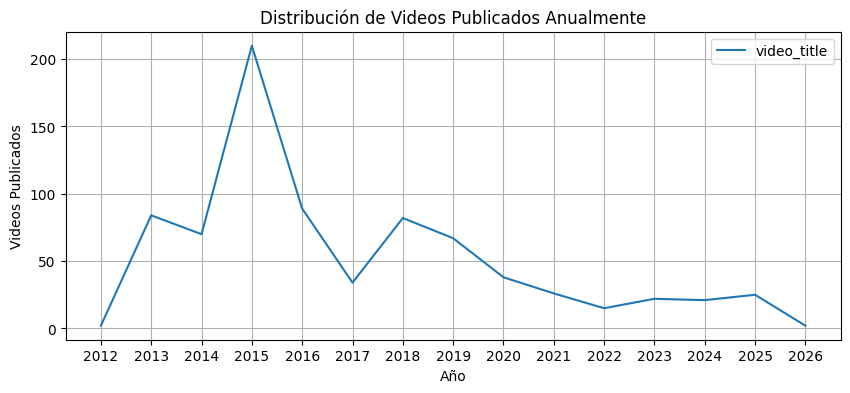

In [445]:
df_videos = (df[['year','video_title']]
             .groupby('year', as_index=False)
             .count())

ax = df_videos.plot(x='year', y='video_title', figsize=(10,4),  kind='line')
plt.xticks(df_videos['year'])
plt.title('Distribución de Videos Publicados Anualmente')
plt.xlabel('Año')
plt.ylabel('Videos Publicados')
plt.grid(True) 
plt.show()

Interpretacón:
- El canal muestra una fase de crecimiento acelerado en sus primeros años: pasa de 2 videos en 2012 a un pico histórico de 210 videos en 2015, reflejando una etapa de alta producción y experimentación intensiva.
- A partir de 2016, se observa una caída pronunciada en la cantidad de videos publicados (89 en 2016 y 34 en 2017), indicando un cambio estructural en la estrategia de contenido.
- En 2018 ocurre un repunte relevante (82 videos), cercano a los niveles de 2013, que puede interpretarse como un último período de transición antes de la consolidación definitiva del formato.
- Desde 2019 hasta 2022, la tendencia vuelve a ser claramente negativa, alcanzando en 2022 solo 15 videos, el valor más bajo desde el inicio del canal.
- En los últimos tres años, el canal entra en una fase de estabilización, con una producción anual de 21, 22 y 25 videos, lo que equivale aproximadamente a 2 videos por mes.

Insight final:
- La evolución en la frecuencia de publicación evidencia una transición clara desde una estrategia basada en volumen hacia un modelo enfocado en calidad, complejidad y alto impacto por video, donde menos publicaciones generan mayor rendimiento agregado.

---

- Distribución de las vista totales anualmente

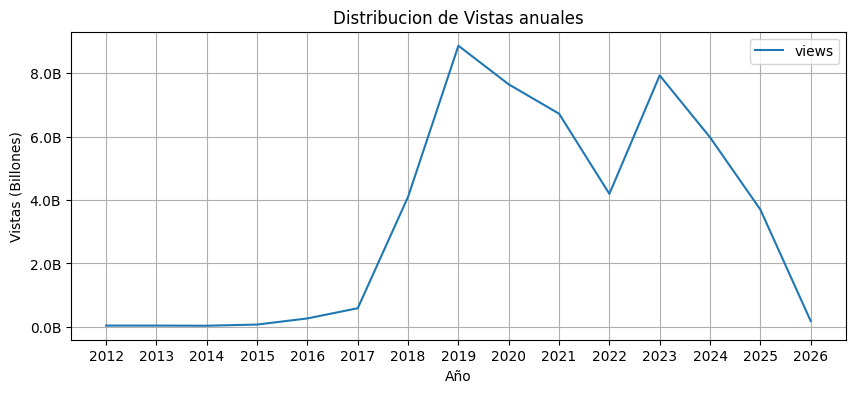

In [444]:
df_views = (df[['year','views']]
            .groupby('year', as_index=False)
            .sum())

ax = df_views.plot(x='year', y='views', figsize=(10,4), kind='line')

ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B')
)
plt.xticks(df_videos['year'])
plt.title('Distribucion de Vistas anuales')
plt.xlabel('Año')
plt.ylabel('Vistas (Billones)')
plt.grid(True)
plt.show()

Interpretación: 
- Las visualizaciones anuales muestran un punto de inflexión claro en 2016, a partir del cual el canal entra en una fase de crecimiento orgánico sostenido hasta 2017.
- En 2018, las vistas se disparan exponencialmente, superando los 4,1 billones, marcando la consolidación del canal como actor dominante en la plataforma.
- El pico histórico se alcanza en 2019, con más de 8,8 billones de visualizaciones, año que representa el máximo impacto agregado del canal hasta la fecha.
- Entre 2020 y 2022, se observa una caída progresiva y sostenida, tocando fondo en 2022 con aproximadamente 4,2 billones, a pesar de que el canal ya contaba con una base masiva de audiencia.
- En 2023, el canal presenta un rebote significativo, alcanzando cerca de 7,9 billones de vistas, convirtiéndose en el segundo mejor año en términos de visualizaciones desde 2019.
- A partir de 2024 y 2025, las vistas vuelven a mostrar una tendencia descendente, llegando en 2025 a su nivel más bajo desde 2018, con alrededor de 3,7 billones.
- En 2026, y considerando únicamente los dos primeros videos publicados en enero, el canal acumula 185,6 millones de vistas, cifra aún no representativa del desempeño anual.

Insight final:
- La evolución de las vistas anuales refleja un ciclo completo de hipercrecimiento, madurez y estabilización, donde el impacto ya no depende del volumen de publicaciones, sino de la capacidad de cada video para generar eventos virales de alto alcance.

---

- Distribución de los comentarios anuales

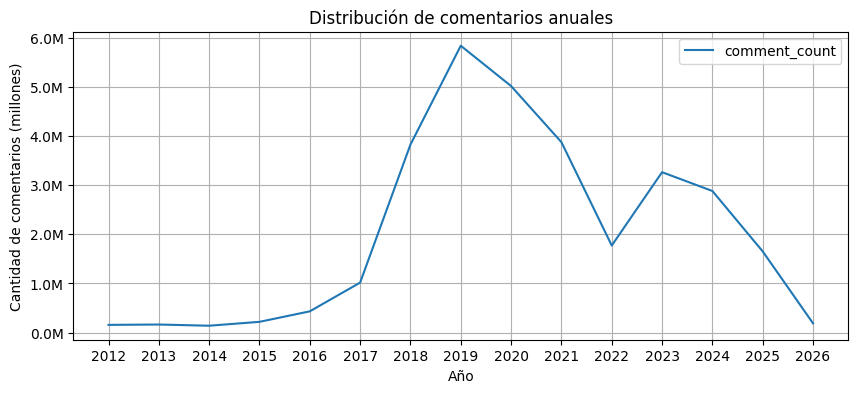

In [430]:
df_comments = (df[['year','comment_count']]
               .groupby('year', as_index=False)
               .sum())

ax = df_comments.plot(x='year', y='comment_count', figsize=(10,4), kind='line')

ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)
plt.xticks(df_videos['year'])
plt.title('Distribución de comentarios anuales')
plt.xlabel('Año')
plt.ylabel('Cantidad de comentarios (millones)')
plt.grid(True)
plt.show()


Interpretación: 
- Al igual que las visualizaciones, el volumen anual de comentarios sigue un patrón altamente correlacionado, lo que indica que la interacción escala principalmente con el alcance del contenido.
- El máximo histórico se registra en 2019, con cerca de 5,8 millones de comentarios, reflejando el punto de mayor exposición y participación de la audiencia.
- Entre 2020 y 2022, los comentarios descienden de forma sostenida, alcanzando en 2022 aproximadamente 1,8 millones, lo que marca el nivel más bajo desde la fase de consolidación del canal.
- En 2023, se observa un repunte claro hasta algo más de 3,2 millones de comentarios, en línea con la recuperación observada en las vistas.
- Durante 2024 y 2025, la interacción vuelve a disminuir, siendo 2025 el año con menor volumen de comentarios desde mediados de 2017.

Insight final:
- La caída del volumen total de comentarios en años recientes no implica una pérdida directa de engagement, sino que refleja una normalización del alcance anual, donde la interacción total depende más del número de “eventos virales” que de la actividad constante de la audiencia.

---

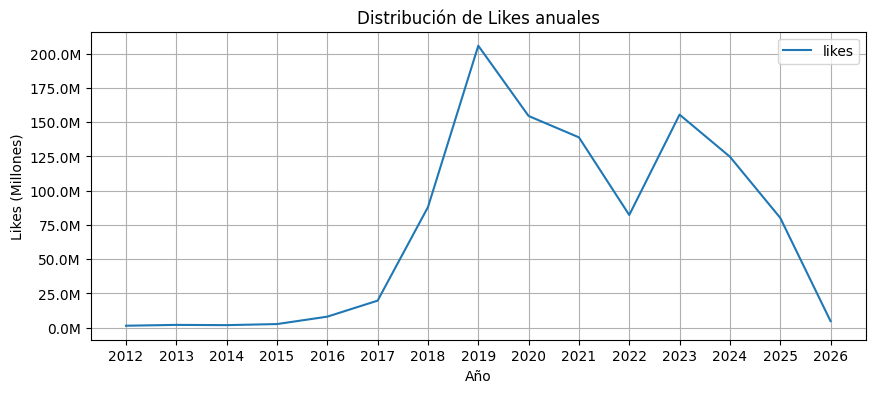

In [431]:
df_likes = (df[['year', 'likes']]
            .groupby('year', as_index=False)
            .sum())

ax = df_likes.plot(x='year', y='likes', figsize=(10,4), kind='line')

ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)
plt.xticks(df_videos['year'])
plt.title('Distribución de Likes anuales')
plt.xlabel('Año')
plt.ylabel('Likes (Millones)')
plt.grid(True)
plt.show()


Interpretación: 
- El comportamiento de los likes anuales replica el patrón observado en vistas y comentarios, lo que refuerza la consistencia del ciclo de crecimiento y madurez del canal.
- El máximo histórico se alcanza en 2019, con cerca de 206 millones de likes, coincidiendo con el año de mayor impacto global.
- A partir de ese punto, los likes descienden progresivamente hasta 2022, año en el que se registran poco más de 82 millones, reflejando una reducción en la interacción agregada.
- En 2023, el canal experimenta un repunte significativo, superando los 155 millones de likes, en línea con la recuperación observada en vistas y comentarios.
- Finalmente, en 2024 y 2025, los likes vuelven a disminuir, alcanzando en 2025 algo más de 80 millones, niveles similares a los de la etapa previa al pico histórico.

Insight final:
- La evolución de los likes confirma que el engagement total del canal está fuertemente condicionado por el alcance anual, y no por una caída estructural en la conexión con la audiencia, lo que es consistente con un canal en fase de madurez avanzada.

---

- Distribución de los likes ratio anualmente

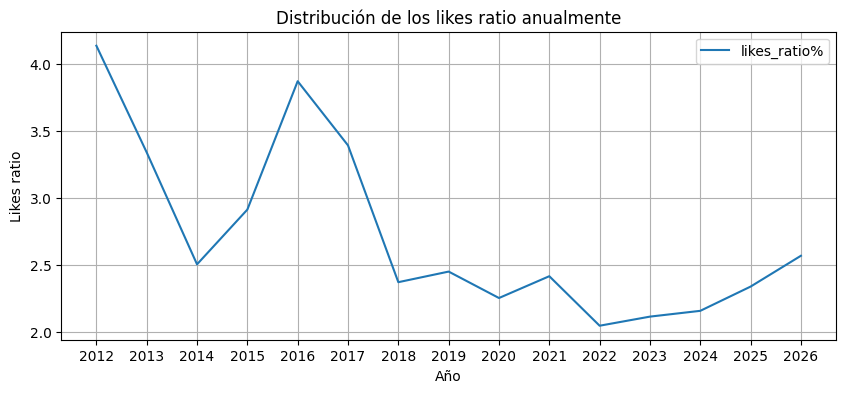

In [474]:
df_likes_ratio = (df[['year','likes_ratio%']]
                  .groupby(by='year', as_index=False)
                  .mean())

ax = df_likes_ratio.plot(y='likes_ratio%', x='year', figsize=(10,4),kind='line')
plt.xticks(df_likes_ratio['year'])
plt.title('Distribución de los likes ratio anualmente')
plt.xlabel('Año')
plt.ylabel('Likes ratio')
plt.grid()
plt.show()

Interpretación:

---

- Distribución de los comments ratio por año

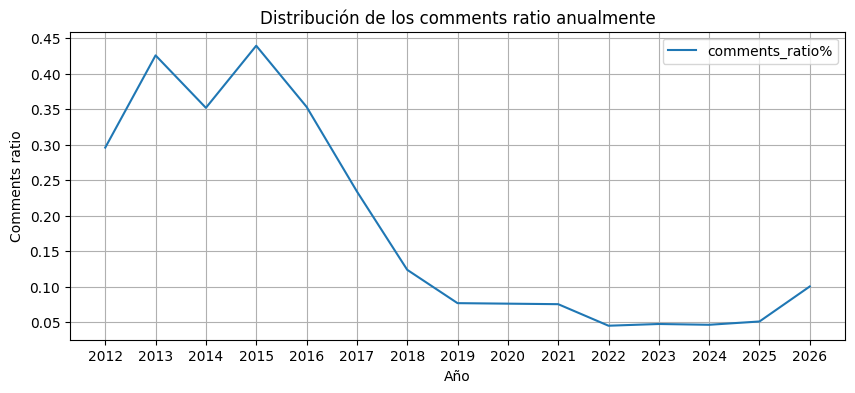

In [476]:
df_comments_ratio = (df[['year','comments_ratio%']]
                  .groupby(by='year', as_index=False)
                  .mean())

ax = df_comments_ratio.plot(y='comments_ratio%', x='year', figsize=(10,4),kind='line')
plt.xticks(df_comments_ratio['year'])
plt.title('Distribución de los comments ratio anualmente')
plt.xlabel('Año')
plt.ylabel('Comments ratio')
plt.grid()
plt.show()

Interpretación:


---

- Duración de los videos promedio por año

In [425]:
years = sorted(df['year'].unique())

data = [df.loc[df['year'] == y, 'duracion_min']
    for y in years]

C:\Users\Jorge\AppData\Local\Temp\ipykernel_21628\2535254449.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(data, labels=years, showfliers=False)
C:\Users\Jorge\AppData\Local\Temp\ipykernel_21628\2535254449.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data, labels=years, showfliers=True)


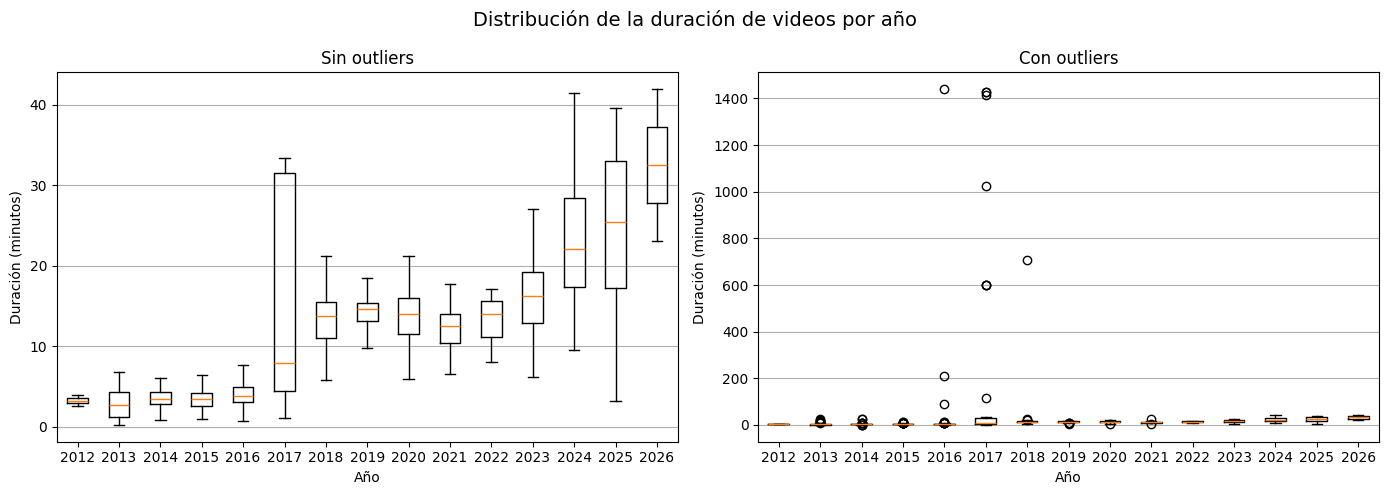

In [426]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  #sin sharey

# ---- Sin outliers ----
axes[0].boxplot(data, labels=years, showfliers=False)
axes[0].set_title('Sin outliers')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Duración (minutos)')
axes[0].grid(axis='y')

# ---- Con outliers ----
axes[1].boxplot(data, labels=years, showfliers=True)
axes[1].set_title('Con outliers')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Duración (minutos)')
axes[1].grid(axis='y')

# ---- Título general ----
fig.suptitle('Distribución de la duración de videos por año', fontsize=14)

plt.tight_layout()
plt.show()


- Videos de mayor duración del canal

In [427]:
df.sort_values(by='duracion_seg', ascending=False).head(15)[['video_id','video_title','year','duration_hms']]

,video_id,video_title,year,duration_hms
401,Fzh65vCyHWQ,24 HOUR EXPLOSION GIVEAWAY! WIN GIFTCARDS,2016,24:0:1
459,xWcldHxHFpo,"I Counted To 100,000!",2017,23:48:6
487,KcsRxHwGz7A,Every Challenge I've Ever Done,2017,23:48:6
481,9CVwXBYVqVk,"Counting To 200,000 (Road To A Mil)",2017,23:34:37
467,_FX6rml2Yjs,"Saying Logan Paul 100,000 Times",2017,17:6:7
545,mGIpOtncmSM,"Saying Pewdiepie 100,000 Times",2018,11:48:40
463,ZJwX2jTXWwQ,Watching It's Everyday Bro For 10 Hours Straight,2017,10:0:10
484,wMn8d7IeCYM,"Saying ""Keep Net Neutrality"" For 10 Hours",2017,10:0:1
455,AS5CxLCWq-Q,Watching Dance Till You're Dead For 10 Hours,2017,10:0:1
366,9Ax56oRhcZc,Counting To 10000 In One Sitting,2016,3:29:40


Interpretación: 
- Solo 12 de los 787 videos del canal superan los 60 minutos, lo que representa 1,52% del total, confirmando que la larga duración no es un formato central en la estrategia de MrBeast.
- Estos videos se concentran principalmente entre 2016 y 2018, una etapa temprana del canal, asociada a experimentación de formatos más que a una estrategia consolidada.
- En años posteriores, el canal reduce drásticamente este tipo de contenido, lo que sugiere una optimización deliberada de la duración alineada con métricas de rendimiento y consumo en YouTube.  

Insight final:
- La desaparición de videos extremadamente largos en etapas recientes indica que MrBeast identifica la duración como una variable crítica de performance, priorizando formatos más eficientes para maximizar retención y escalabilidad.

In [433]:
(df[df['year']==2017]
 .sort_values('duracion_seg', ascending=False)
 [['link','video_title', 'duration_hms' , 'duracion_seg']]
 .head(10))

,link,video_title,duration_hms,duracion_seg
487,https://www.youtube.com/watch?v=KcsRxHwGz7A,Every Challenge I've Ever Done,23:48:6,85686
459,https://www.youtube.com/watch?v=xWcldHxHFpo,"I Counted To 100,000!",23:48:6,85686
481,https://www.youtube.com/watch?v=9CVwXBYVqVk,"Counting To 200,000 (Road To A Mil)",23:34:37,84877
467,https://www.youtube.com/watch?v=_FX6rml2Yjs,"Saying Logan Paul 100,000 Times",17:6:7,61567
463,https://www.youtube.com/watch?v=ZJwX2jTXWwQ,Watching It's Everyday Bro For 10 Hours Straight,10:0:10,36010
455,https://www.youtube.com/watch?v=AS5CxLCWq-Q,Watching Dance Till You're Dead For 10 Hours,10:0:1,36001
484,https://www.youtube.com/watch?v=wMn8d7IeCYM,"Saying ""Keep Net Neutrality"" For 10 Hours",10:0:1,36001
458,https://www.youtube.com/watch?v=IZVbzNRUlQI,"Reading The Longest English Word (190,000 Char...",1:54:48,6888
473,https://www.youtube.com/watch?v=rqUvnLPvbrM,Reacting To The Reaction Of The Reaction To Th...,0:33:28,2008
488,https://www.youtube.com/watch?v=iengNekeTNo,Reading The Youtube Terms Of Service,0:25:57,1557


Interpretación: 
- En los primeros años del canal, la duración promedio de los videos no superaba los 5 minutos, coincidiendo con el período de menor alcance e interacción en términos de vistas, likes y comentarios.
- En 2016, se observa el primer salto estructural en el formato del canal, con una duración promedio cercana a los 24 minutos, lo que marca la transición hacia contenidos más elaborados.
- El pico extremo de 2017 (≈ 218 minutos) está explicado por la presencia de outliers, correspondientes a videos de formato experimental y duración excepcional, algunos de ellos superando las 10 horas e incluso las 23 horas.
- Estos videos largos responden a desafíos virales y de resistencia (ej. counting, watching for hours), que posteriormente serán analizados para evaluar su relación real con el crecimiento o la caída del canal.
- A partir de 2018, la duración promedio se re-estandariza alrededor de los 23 minutos, con variaciones controladas entre 12 y 25 minutos, patrón que se mantiene de forma estable hasta 2025.
- En 2026, con datos aún parciales, se observa una duración promedio cercana a los 32 minutos, valor que deberá interpretarse con cautela.

Insight: 
- La evolución de la duración promedio refleja el paso de un canal experimental y de bajo impacto a un modelo optimizado y estable, donde los formatos extremos funcionan como excepciones estratégicas y no como el núcleo del éxito sostenido.

La pregunta queda: Tendra correlacion que sus videos mas largos en el 2017 hayan sido los videos que preparanron el terreno para alcanzar los picos que ya se mostraron en el 2018 en cuantos a vistas, likes, comentarios?

- Comparativas

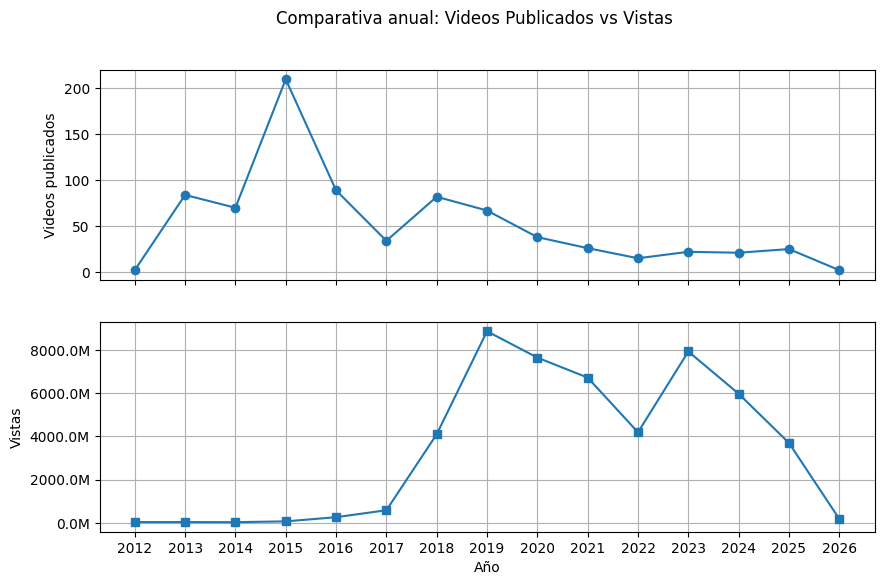

In [440]:
# Gráfica comparativa Vistas vs Videos Publicados
fig, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)

# ---- Gráfica 1: número de videos ----
axes[0].plot(df_videos['year'], df_videos['video_title'], marker='o')
plt.xticks(df_videos['year'])
axes[0].set_ylabel('Videos publicados')
axes[0].grid(True)

# ---- Gráfica 2: vistas ----
axes[1].plot(df_views['year'], df_views['views'], marker='s')
axes[1].set_ylabel('Vistas')
axes[1].set_xlabel('Año')
axes[1].grid(True)
axes[1].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)
plt.suptitle('Comparativa anual: Videos Publicados vs Vistas')
plt.show()


- Gráfica comparativa Duración Media de Videos vs Vistas

In [459]:
df_duracion_media = (df[['year', 'duracion_min']]
                    .groupby('year', as_index=False)
                    .mean())

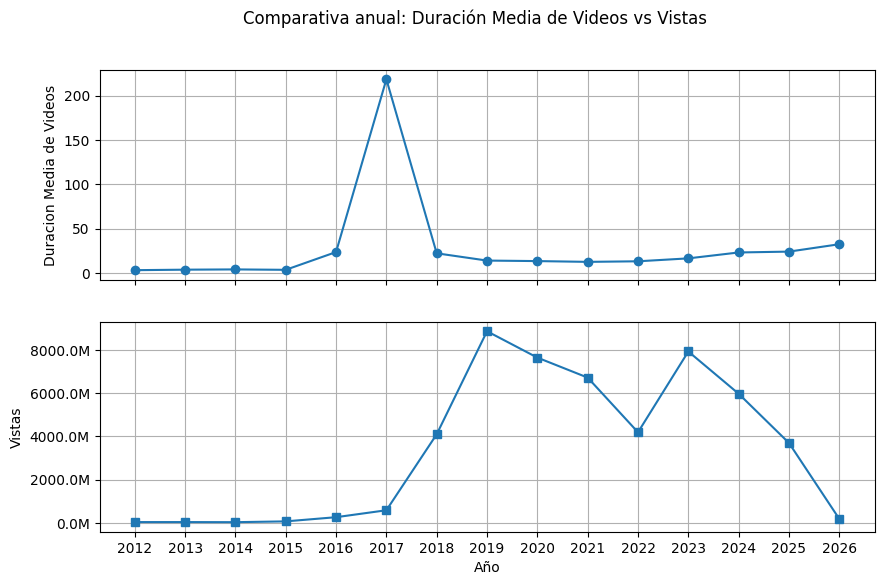

In [435]:
fig, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)

# ---- Gráfica 1 duracion ----
axes[0].plot(df_duracion_media['year'], df_duracion_media['duracion_min'], marker='o')
plt.xticks(df_duracion_media['year'])
axes[0].set_ylabel('Duracion Media de Videos')
axes[0].grid(True)

# ---- Gráfica 2: vistas ----
axes[1].plot(df_views['year'], df_views['views'], marker='s')
axes[1].set_ylabel('Vistas')
axes[1].set_xlabel('Año')
axes[1].grid(True)
axes[1].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)
plt.suptitle('Comparativa anual: Duración Media de Videos vs Vistas')
plt.show()

- Gráfica comparativa Duración Media vs Likes

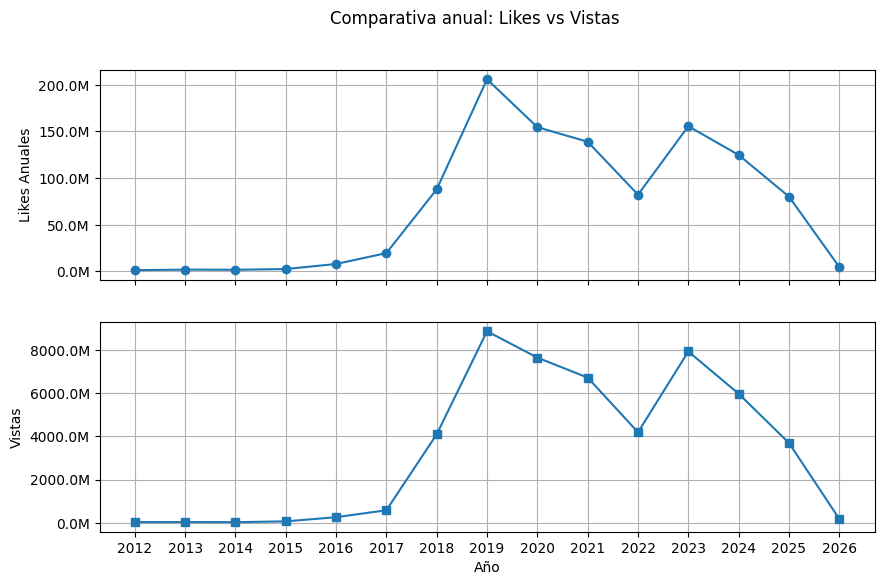

In [442]:
fig, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)

# ---- Gráfica 1 likes ----
axes[0].plot(df_likes['year'], df_likes['likes'], marker='o')
plt.xticks(df_duracion_media['year'])
axes[0].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)
axes[0].set_ylabel('Likes Anuales')
axes[0].grid(True)

# ---- Gráfica 2: vistas ----
axes[1].plot(df_views['year'], df_views['views'], marker='s')
axes[1].set_ylabel('Vistas')
axes[1].set_xlabel('Año')
axes[1].grid(True)
axes[1].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)
plt.suptitle('Comparativa anual: Likes vs Vistas')
plt.show()



- Gráfica comparativa Duración Media de likes vs Vistas

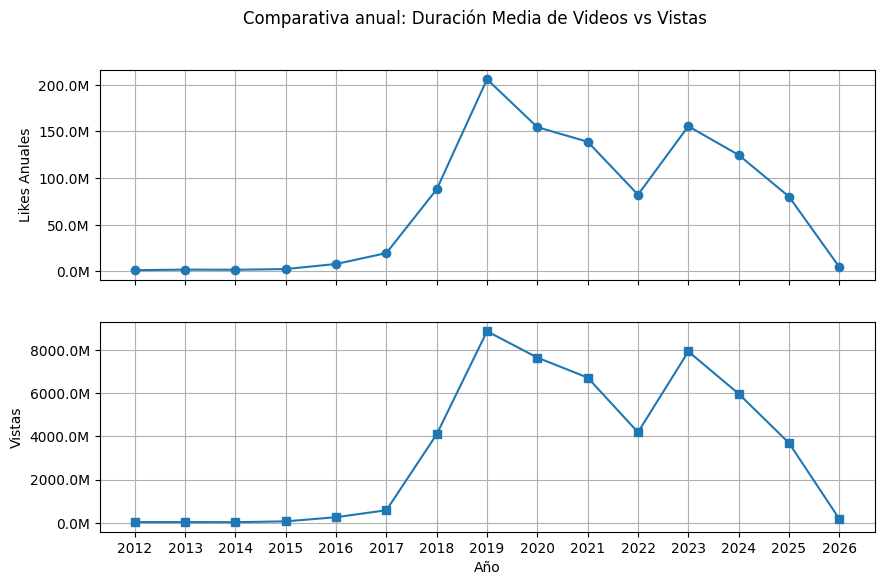

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)

# ---- Gráfica likes ----
axes[0].plot(df_likes['year'], df_likes['likes'], marker='o')
plt.xticks(df_duracion_media['year'])
axes[0].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)
axes[0].set_ylabel('Likes Anuales')
axes[0].grid(True)

# ---- Gráfica 2: vistas ----
axes[1].plot(df_views['year'], df_views['views'], marker='s')
axes[1].set_ylabel('Vistas')
axes[1].set_xlabel('Año')
axes[1].grid(True)
axes[1].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)
plt.suptitle('Comparativa anual: Likes vs Vistas')
plt.show()


Preguntas que debes responder:

¿Produce más o menos videos con el tiempo?

¿Las vistas crecen aunque suba menos?

¿Hay cambios claros de formato?

## Rankings

In [439]:
# Videos más vistos
df.sort_values(by='views', ascending=False)[['video_title','views', 'duration_hms', 'likes_ratio%', 'comments_ratio%', 'year','link']].head(10)

,video_title,views,duration_hms,likes_ratio%,comments_ratio%,year,link
676,"$456,000 Squid Game In Real Life!",904626139,0:25:41,2.194,0.071,2021,https://www.youtube.com/watch?v=0e3GPea1Tyg
677,"Last To Leave Circle Wins $500,000",547691165,0:17:43,1.432,0.024,2021,https://www.youtube.com/watch?v=zxYjTTXc-J8
717,World's Most Expensive Flights!,539192505,0:12:20,1.650,0.032,2023,https://www.youtube.com/watch?v=1WEAJ-DFkHE
718,"$1 vs $100,000,000 Car!",531333496,0:16:28,1.507,0.029,2023,https://www.youtube.com/watch?v=KrLj6nc516A
719,"$1 vs $1,000,000,000 Yacht!",527349634,0:14:47,1.573,0.031,2023,https://www.youtube.com/watch?v=48h57PspBec
720,"$10,000 Every Day You Survive In A Grocery Store",495973552,0:21:32,1.495,0.018,2023,https://www.youtube.com/watch?v=tnTPaLOaHz8
739,7 Days Stranded On An Island,464710855,0:22:26,1.620,0.032,2024,https://www.youtube.com/watch?v=erLbbextvlY
721,"Ages 1 - 100 Fight For $500,000",455628519,0:25:35,1.476,0.026,2023,https://www.youtube.com/watch?v=FM7Z-Xq8Drc
740,"50 YouTubers Fight For $1,000,000",441307811,0:41:27,2.187,0.079,2024,https://www.youtube.com/watch?v=4SNThp0YiU4
722,"Survive 100 Days Trapped, Win $500,000",438476073,0:27:8,1.564,0.022,2023,https://www.youtube.com/watch?v=9RhWXPcKBI8


### likes_ratio
- < 1% → bajo
- 1–4% → normal
- 5–8% → muy bueno
- 8% → excelente / viral
### comments_ratio
- < 0.1% → bajo
- 0.1–0.5% → normal
- 0.5% → alto engagement

Preguntas a responder:

- ¿Duración importa?
- ¿Engagement temprano importa?
- ¿El “año” explica parte del éxito?

Rta/ 